# Section 1 - Connecting the dataset and making basic exploration to understand the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 14BraZ_TLQ0umzhaknzLVtE_mD0ehvAyh

Downloading...
From: https://drive.google.com/uc?id=14BraZ_TLQ0umzhaknzLVtE_mD0ehvAyh
To: /content/netflix_titles.csv
100% 3.40M/3.40M [00:00<00:00, 38.0MB/s]


In [ ]:
df = pd.read_csv("netflix_titles.csv")

In [ ]:
df.shape
# has 8807 rows and 12 columns.

(8807, 12)

In [ ]:
df.info()
# There is 1 int datatype and rest 11 is of of object datatype
# column names are in lower case which has to be changed----
# There are 6 columns out of the 12 with null values.
# These null values needed to be replaced or the respective row/ columns should be dropped ----



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.sample(10)
# The 3 columns "cast", "director" and "listed_in" have multiple values.
# After careful considerations and depending on the need some columns above needed to be unnested----

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7694,s7695,Movie,Pahuyut Fighting Beat,Piti Jaturaphat,"Nattanun Jantarawetch, David Bueno, Peerawat H...",Thailand,"July 26, 2018",2007,TV-MA,82 min,"Action & Adventure, International Movies",When profit-seekers threaten to take over a ba...
5007,s5008,Movie,Dil Se,Mani Ratnam,"Shah Rukh Khan, Manisha Koirala, Preity Zinta,...",India,"March 1, 2018",1998,TV-14,166 min,"Dramas, International Movies, Romantic Movies",A radio broadcaster's intense attraction to a ...
362,s363,Movie,The Lost Café,Kenneth Gyang,"Tunde Aladese, Omatta Udalor, Terje Lien, Ann ...",NaN,"July 31, 2021",2018,TV-14,76 min,"Dramas, International Movies",An aspiring filmmaker grapples with her decisi...
1319,s1320,Movie,Xico's Journey,Eric D. Cabello Díaz,"Verónica Alva, Pablo Gama Iturrarán “Mago Gami...",Mexico,"February 12, 2021",2021,TV-Y7,87 min,Children & Family Movies,"A girl, a dog and her best pal set out to save..."
6524,s6525,TV Show,Conan Without Borders,NaN,NaN,United States,"December 31, 2018",2018,TV-14,1 Season,"Docuseries, TV Comedies",Late-night talk show host Conan O'Brien hits t...
6713,s6714,Movie,Everybody Knows,Asghar Farhadi,"Penélope Cruz, Javier Bardem, Ricardo Darín, E...","Spain, France, Italy","June 6, 2019",2019,R,133 min,"Dramas, International Movies, Thrillers",Journeying back to her small Spanish hometown ...
3652,s3653,Movie,"¡Ay, mi madre!",Frank Ariza,"Estefanía de los Santos, Secun de la Rosa, Ter...",Spain,"July 19, 2019",2019,TV-MA,81 min,"Comedies, International Movies","When her estranged mother suddenly dies, a wom..."
2498,s2499,Movie,Mutiny of the Worker Bees,Carlos Morett,"Gustavo Egelhaaf, Alejandro Suárez, Bárbara de...",Mexico,"May 20, 2020",2020,TV-MA,94 min,"Comedies, International Movies",When Omar's grandfather forces him to get a jo...
2913,s2914,Movie,Fanatyk,Michał Tylka,"Piotr Cyrwus, Mikołaj Kubacki, Anna Radwan, Ma...",Poland,"February 14, 2020",2017,TV-MA,33 min,"Comedies, Dramas, Independent Movies","As a son deals with his own struggles, he must..."
3037,s3038,TV Show,Medical Police,NaN,"Erinn Hayes, Rob Huebel, Malin Akerman, Rob Co...",United States,"January 10, 2020",2020,TV-MA,1 Season,"Crime TV Shows, TV Action & Adventure, TV Come...",Doctors Owen Maestro and Lola Spratt leave Chi...


In [ ]:
df['director'].str.contains(", ").any()
# Proves that we have multiple values sep by ","

True

In [ ]:
df['cast'].str.contains(",").any()
# Proves that we have multiple values sep by ","

True

In [ ]:
df['listed_in'].str.contains(",").any()
# Proves that we have multiple values sep by ","
# Unnesting these column woulbe be unnecessary.
# As we can manage the popularity aspect of genres without breaking each generate into seperate rows.

True

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Inference on Section 1 -**
* We can see that the above dataset has content ranging from 1925 to 2021.
* We can notice that there are a lot of null values
* Dimension of the dataset is 8807 x 12
* Multiple values are present in country, cast and directors coluumn, so it it is imperative to unnest them to seperate rows.


# Section 2 - Data Cleaning
* Based on the previous section we have to do the following things to make the dataset EDA ready.
    * Unnesting the multiple values
    * Handling Null values

* ***Unnesting the multiple values***

**a. Un-nesting the "director" column**

In [ ]:
df['director']
# The resulting multiple values has to be split and un-nested

0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [ ]:
director_unnest = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).to_list(), index = df.title)
director_unnest = director_unnest.stack().reset_index().drop('level_1', axis = 1).rename(columns = {0:'director'})
director_unnest
#

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


**b. Un-nesting the "cast" column**

In [ ]:
df['cast']
# The resulting multiple values has to be split and un-nested

0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [ ]:
cast_unnest = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).to_list(), index = df.title)
cast_unnest = cast_unnest.stack().reset_index().drop('level_1', axis = 1).rename(columns = {0:'cast'})
cast_unnest


,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


**c. Merging the unnested director and cast column together**

In [ ]:
unnested_df = director_unnest.merge(cast_unnest, on = 'title', how = 'inner')
unnested_df

,title,director,cast
0,Dick Johnson Is Dead,Kirsten Johnson,nan
1,Blood & Water,nan,Ama Qamata
2,Blood & Water,nan,Khosi Ngema
3,Blood & Water,nan,Gail Mabalane
4,Blood & Water,nan,Thabang Molaba
...,...,...,...
70807,Zubaan,Mozez Singh,Manish Chaudhary
70808,Zubaan,Mozez Singh,Meghna Malik
70809,Zubaan,Mozez Singh,Malkeet Rauni
70810,Zubaan,Mozez Singh,Anita Shabdish


**d. Changing the format of date_added column.**

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format = '%B %d, %Y', errors = 'coerce')
df[df['date_added'].isnull()]





,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,NaT,2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6177,s6178,TV Show,忍者ハットリくん,NaN,NaN,Japan,NaT,2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto..."
6213,s6214,TV Show,Bad Education,NaN,"Jack Whitehall, Mathew Horne, Sarah Solemani, ...",United Kingdom,NaT,2014,TV-MA,3 Seasons,"British TV Shows, TV Comedies","A history teacher at the posh Abbey Grove, Alf..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8539,s8540,TV Show,The Tudors,NaN,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,2010,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...
8557,s8558,TV Show,The West Wing,NaN,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,2005,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...
8684,s8685,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ..."
8712,s8713,TV Show,Weird Wonders of the World,NaN,Chris Packham,United Kingdom,NaT,2016,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...


**e. Merging the 'unnested_df' with rest of the columns to complete the dataset with all relevant information to facilitate EDA process.**

In [ ]:
netflix_df = unnested_df.merge(df[['show_id', 'type','title', 'country',
                                   'date_added','release_year', 'rating',
                                   'listed_in', 'duration']], on = 'title', how = 'inner')
netflix_df

,title,director,cast,show_id,type,country,date_added,release_year,rating,listed_in,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,s1,Movie,United States,2021-09-25,2020,PG-13,Documentaries,90 min
1,Blood & Water,nan,Ama Qamata,s2,TV Show,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
2,Blood & Water,nan,Khosi Ngema,s2,TV Show,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
3,Blood & Water,nan,Gail Mabalane,s2,TV Show,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
4,Blood & Water,nan,Thabang Molaba,s2,TV Show,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
70807,Zubaan,Mozez Singh,Manish Chaudhary,s8807,Movie,India,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min
70808,Zubaan,Mozez Singh,Meghna Malik,s8807,Movie,India,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min
70809,Zubaan,Mozez Singh,Malkeet Rauni,s8807,Movie,India,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min
70810,Zubaan,Mozez Singh,Anita Shabdish,s8807,Movie,India,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min


**f. Unnesting Country Column and merge with rest of the final data set**

In [ ]:
df['country'].str.contains(', ').any()
# this proves that we have nested values in the country column


True

In [ ]:
unnest_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).to_list(), index = df['title'])
unnest_country = unnest_country.stack().reset_index().drop('level_1', axis = 1).rename(columns = {0: 'country'})
netflix_df = unnest_country.merge(netflix_df, left_on = ['title', 'country'], right_on = ['title', 'country'], how = 'inner')
netflix_df

,title,country,director,cast,show_id,type,date_added,release_year,rating,listed_in,duration
0,Dick Johnson Is Dead,United States,Kirsten Johnson,nan,s1,Movie,2021-09-25,2020,PG-13,Documentaries,90 min
1,Blood & Water,South Africa,nan,Ama Qamata,s2,TV Show,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
2,Blood & Water,South Africa,nan,Khosi Ngema,s2,TV Show,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
3,Blood & Water,South Africa,nan,Gail Mabalane,s2,TV Show,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
4,Blood & Water,South Africa,nan,Thabang Molaba,s2,TV Show,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
53283,Zubaan,India,Mozez Singh,Manish Chaudhary,s8807,Movie,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min
53284,Zubaan,India,Mozez Singh,Meghna Malik,s8807,Movie,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min
53285,Zubaan,India,Mozez Singh,Malkeet Rauni,s8807,Movie,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min
53286,Zubaan,India,Mozez Singh,Anita Shabdish,s8807,Movie,2019-03-02,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min



* ***Handling Null values***
    * As per instruction we are converting the value of the null values with "Unknown Column_name" if it is a Categorical variable.
    * If it is a Continuous valriable we are instructed replace the null values with '0'
    * I have added efficient ways at the end to efficiently replace the null values with more accurate which will help to increase the overall accuracy of the analysis.

* Continuous Variables
    * 'date_added', 'release_year'

* Categorical Varibles
    * 'show_id', 'type', 'title', 'country', 'rating', 'listed_in', 'duration'




In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_df['cast'].replace(['nan'], ['Unknown Actor'], inplace = True)
netflix_df['director'].replace(['nan'], ['Unknown Director'], inplace = True)
netflix_df['country'].replace(['nan'], ['Unknown Country'], inplace = True)



In [ ]:
netflix_df.sample(10)

,title,country,director,cast,show_id,type,date_added,release_year,rating,listed_in,duration
32475,46,Turkey,Serdar Akar,Melis Birkan,s5389,TV Show,2017-07-01,2016,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",1 Season
10681,Social Distance,United States,Unknown Director,Miguel Sandoval,s1855,TV Show,2020-10-15,2020,TV-MA,"TV Comedies, TV Dramas",1 Season
21638,Avengement,United Kingdom,Jesse V. Johnson,Craig Fairbrass,s3512,Movie,2019-09-17,2019,TV-MA,Action & Adventure,88 min
6979,Eeb Allay Ooo!,India,Prateek Vats,Shardul Bhardwaj,s1296,Movie,2021-02-18,2019,TV-MA,"Comedies, Dramas, Independent Movies",97 min
38046,Big Daddy,United States,Dennis Dugan,Rob Schneider,s6304,Movie,2020-10-01,1999,PG-13,Comedies,93 min
31665,Star Trek: Enterprise,United States,Unknown Director,Connor Trinneer,s5245,TV Show,2017-10-01,2004,TV-14,"Classic & Cult TV, TV Action & Adventure, TV S...",4 Seasons
12903,Toradora!,Japan,Unknown Director,Rie Kugimiya,s2181,TV Show,2020-08-01,2008,TV-14,"Anime Series, International TV Shows, Romantic...",1 Season
36477,A Wednesday,India,Neeraj Pandey,Kali Prasad Mukherjee,s6064,Movie,2018-11-01,2008,TV-MA,"Action & Adventure, Dramas, International Movies",103 min
48759,Spartacus,United States,Unknown Director,Andy Whitfield,s8065,TV Show,NaT,2013,TV-MA,"TV Action & Adventure, TV Dramas",4 Seasons
16549,Magnificent,India,Vikas Bahl,Pankaj Kapur,s2736,Movie,2020-04-01,2015,TV-14,"Comedies, International Movies, Romantic Movies",143 min


In [ ]:
netflix_df.isnull().sum()


title             0
country           0
director          0
cast              0
show_id           0
type              0
date_added      572
release_year      0
rating           36
listed_in         0
duration          3
dtype: int64

# Handling the rest of the Categorical Null values
We can see we have handled the null value for 3 columns and for 'rating' and 'duration' columns we will take the data from the "IMDB" website and replace them.

*Rating Column*




In [ ]:
# 1. Checking the null ratings
netflix_df[netflix_df['rating'].isnull()]

,title,country,director,cast,show_id,type,date_added,release_year,rating,listed_in,duration
40979,Gargantia on the Verdurous Planet,Japan,Unknown Director,Kaito Ishikawa,s6828,TV Show,2016-12-01,2013,NaN,"Anime Series, International TV Shows",1 Season
40980,Gargantia on the Verdurous Planet,Japan,Unknown Director,Hisako Kanemoto,s6828,TV Show,2016-12-01,2013,NaN,"Anime Series, International TV Shows",1 Season
40981,Gargantia on the Verdurous Planet,Japan,Unknown Director,Ai Kayano,s6828,TV Show,2016-12-01,2013,NaN,"Anime Series, International TV Shows",1 Season
40982,Gargantia on the Verdurous Planet,Japan,Unknown Director,Kana Asumi,s6828,TV Show,2016-12-01,2013,NaN,"Anime Series, International TV Shows",1 Season
40983,Gargantia on the Verdurous Planet,Japan,Unknown Director,Shizuka Ito,s6828,TV Show,2016-12-01,2013,NaN,"Anime Series, International TV Shows",1 Season
40984,Gargantia on the Verdurous Planet,Japan,Unknown Director,Sayaka Ohara,s6828,TV Show,2016-12-01,2013,NaN,"Anime Series, International TV Shows",1 Season
40985,Gargantia on the Verdurous Planet,Japan,Unknown Director,Katsuyuki Konishi,s6828,TV Show,2016-12-01,2013,NaN,"Anime Series, International TV Shows",1 Season
40986,Gargantia on the Verdurous Planet,Japan,Unknown Director,Yuka Terasaki,s6828,TV Show,2016-12-01,2013,NaN,"Anime Series, International TV Shows",1 Season
40987,Gargantia on the Verdurous Planet,Japan,Unknown Director,Yuki Ono,s6828,TV Show,2016-12-01,2013,NaN,"Anime Series, International TV Shows",1 Season
40988,Gargantia on the Verdurous Planet,Japan,Unknown Director,Tomokazu Sugita,s6828,TV Show,2016-12-01,2013,NaN,"Anime Series, International TV Shows",1 Season


In [ ]:
# 2. Filling the null cells with IMDB accurate ratings
netflix_df.loc[netflix_df['show_id'] == 's5990', :] = netflix_df[netflix_df['show_id'] == 's5990'].replace(np.nan, 'TV-MA')
netflix_df.loc[netflix_df['show_id'] == 's6828', :] = netflix_df[netflix_df['show_id'] == 's6828'].replace(np.nan, 'PG')
netflix_df.loc[netflix_df['show_id'] == 's7313', :] = netflix_df[netflix_df['show_id'] == 's7313'].replace(np.nan, 'R')
netflix_df.loc[netflix_df['show_id'] == 's7538', :] = netflix_df[netflix_df['show_id'] == 's7538'].replace(np.nan, 'TV-MA')

*Duration Column*

In [ ]:
# 1. Checking the null duration
netflix_df[netflix_df['duration'].isnull()]

,title,country,director,cast,show_id,type,date_added,release_year,rating,listed_in,duration
33302,Louis C.K. 2017,United States,Louis C.K.,Louis C.K.,s5542,Movie,2017-04-04,2017,74 min,Movies,NaN
34839,Louis C.K.: Hilarious,United States,Louis C.K.,Louis C.K.,s5795,Movie,2016-09-16,2010,84 min,Movies,NaN
34906,Louis C.K.: Live at the Comedy Store,United States,Louis C.K.,Louis C.K.,s5814,Movie,2016-08-15,2015,66 min,Movies,NaN


In [ ]:
# 2. Filling the null duration cells
netflix_df.loc[netflix_df['show_id'] == 's5542', 'duration'] = netflix_df.loc[netflix_df['show_id'] == 's5542', 'rating']
netflix_df.loc[netflix_df['show_id'] == 's5542', 'rating'] = 'TV-MA'
# Test purpose
# netflix_df.loc[netflix_df['show_id'] == 's5542', :]

netflix_df.loc[netflix_df['show_id'] == 's5795', 'duration'] = netflix_df.loc[netflix_df['show_id'] == 's5795', 'rating']
netflix_df.loc[netflix_df['show_id'] == 's5795', 'rating'] = 'TV-MA'
# Test purpose
# netflix_df.loc[netflix_df['show_id'] == 's5795', :]

netflix_df.loc[netflix_df['show_id'] == 's5814', 'duration'] = netflix_df.loc[netflix_df['show_id'] == 's5814', 'rating']
netflix_df.loc[netflix_df['show_id'] == 's5814', 'rating'] = 'TV-MA'
# Test purpose
# netflix_df.loc[netflix_df['show_id'] == 's5814', :]

In [ ]:
netflix_df.isnull().sum()

title             0
country           0
director          0
cast              0
show_id           0
type              0
date_added      572
release_year      0
rating            0
listed_in         0
duration          0
dtype: int64

*date_added column*
* *As per the said guidance for this analysis the null values of continuous variable should be replaced by '0'*
* *'date_added' --> continuous variable*
* ***End of this session I will be adding a set code that can increase the efficiency of analysis***

In [ ]:
netflix_df['date_added'].fillna(0, inplace = True)

In [ ]:
netflix_df.isnull().sum()

title           0
country         0
director        0
cast            0
show_id         0
type            0
date_added      0
release_year    0
rating          0
listed_in       0
duration        0
dtype: int64

All null values are handled and the data is ready for analysis

# How to increase the Overall Analysis.
* In our case we are instructed to replace the continuous variable by '0' which makes sense because we had only 10 null values in the Continuous variable column out of 8807 rows.
* Therefore dropping them or replacing them with 0 makes sense, in this case.

# Best Approach
* It is a good practice to replace null values with educated guess.
* Our data set have movies ranging from 1925 to 2021, whereas the Netflix was launched in the year 2007 and adds the movie to their platform within an year the movie getting released.
* But we can't say a movie that was relesased in 1925 was added tro netflix at 1925, that would be absurd.
* **We should find the mode for each year and replace values based on them instead of blindly upping years by 1.**



# ***Finding mode value with respect to each year***

In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format = '%B %d, %Y', errors = 'coerce')
df['date_added'].isnull().sum()

98

In [ ]:
null_date_rows = netflix_df[netflix_df['date_added'].isnull()]
null_year = null_date_rows['release_year'].unique()
null_year.sort()
null_year

array([1967, 1977, 1988, 1990, 1992, 1998, 2003, 2005, 2008, 2010, 2012,
       2013, 2014, 2015, 2016, 2017, 2018])

So we have all the rows with null values w.r.t to the release_year column.

In [ ]:
# calculating the mode with repective to each year and takking the first value
mode_year = df['date_added'].groupby(by = df['release_year']).agg(pd.Series.mode).to_frame()
missing_dates_table = mode_year.loc[null_year,:]
missing_dates_table

,date_added
release_year,
1967,2021-01-01 00:00:00
1977,2019-12-31 00:00:00
1988,2011-10-01 00:00:00
1990,"[2011-10-01 00:00:00, 2019-12-31 00:00:00, 202..."
1992,2020-01-01 00:00:00
1998,2019-11-01 00:00:00
2003,2021-09-01 00:00:00
2005,2020-01-01 00:00:00
2008,"[2018-11-01 00:00:00, 2019-07-01 00:00:00, 201..."


We have a list of years for which there are null values in their "date_added" column with their mode values. We can **replace the null with these mode values which will be more precise for analysis purpose** but as instructed we are reverting these values back to the '0' value to maintain the uniformity.

In [ ]:
netflix_df['date_added'].fillna(0, inplace = True)

In [ ]:
netflix_df.isnull().sum()

title           0
country         0
director        0
cast            0
show_id         0
type            0
date_added      0
release_year    0
rating          0
listed_in       0
duration        0
dtype: int64

**Inference from Section 2-**
* It involves two steps one being unnesting the column with multiple rows.
* Second being Null values to make the dataset ready for analysis.
* Null values from Categorical variables are replaced by "Unknown Column_name" as per the guidance.
* Also few categorical null values are replaced by values from websites like "IMDB" and "Wikipedia".
* Employed a method showing how using functions like mode are used to take a eductive guess to enhance the accuracy of the analysis.

# Section 3 - Analysis and Visualisation

**Analysing the categorical Values**

***----Title Column----***

**Total Number of Available content**

In [ ]:
len(df['title'].index)

8807

**Proportion of Movies and TV Shows**

In [ ]:
df.groupby(by ='type')['title'].count()

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

**Visual Representation of TV Shows and Movies proportion**

<Axes: xlabel='type', ylabel='count'>

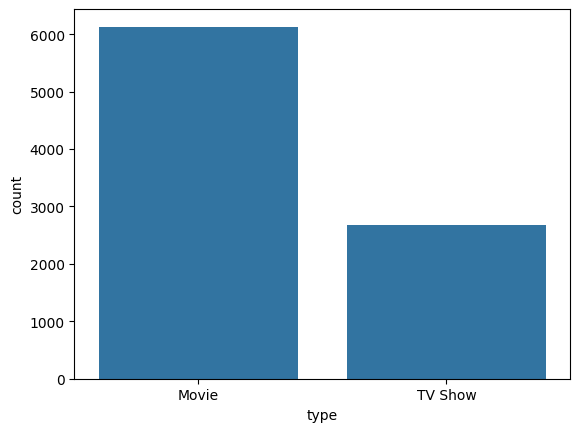

In [ ]:
sns.countplot(x = 'type', data = df)

**Trends of Movies over the years**

In [ ]:
content_counts = df['release_year'].value_counts().sort_index().reset_index()
content_counts.columns = ['Year', 'Num_of_movies']
content_counts


,Year,Num_of_movies
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


<Axes: xlabel='Year', ylabel='Num_of_movies'>

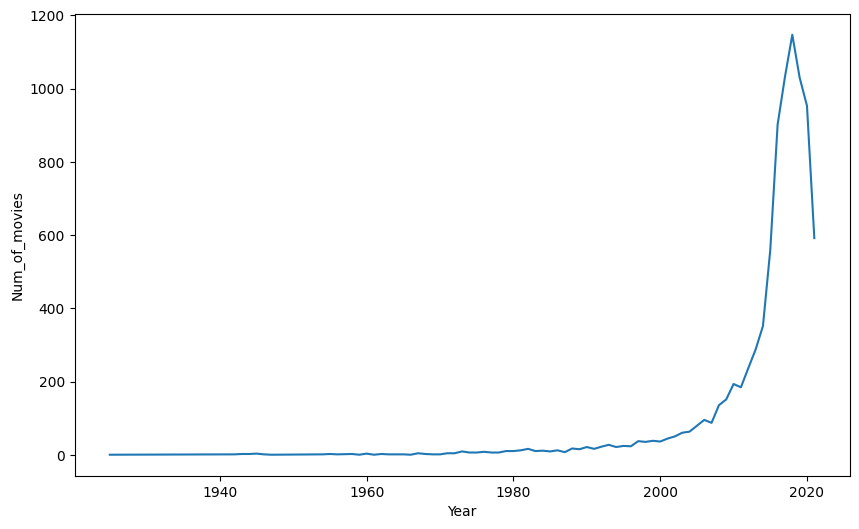

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'Year', y = 'Num_of_movies', data = content_counts)

Inference-
* We can see the most of the movies in netflix from after 2000.
* There are some very good opportunities to add some old classic movies which are hard to find elsewhere.

***----director column----***

**Total number of directors listed on Netflix**

In [ ]:
netflix_df['director'].nunique()

3921

**Top 10 directors who have produced large number of movies/ TV shows**




In [ ]:
top_directors = netflix_df.drop_duplicates(subset = ['title', 'director'])
top_directors

# We have droped the repeating titles w.r.t director name therefore no duplication and no data is lost.

,title,country,director,cast,show_id,type,date_added,release_year,rating,listed_in,duration
0,Dick Johnson Is Dead,United States,Kirsten Johnson,Unknown Actor,s1,Movie,2021-09-25 00:00:00,2020,PG-13,Documentaries,90 min
1,Blood & Water,South Africa,Unknown Director,Ama Qamata,s2,TV Show,2021-09-24 00:00:00,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
20,Kota Factory,India,Unknown Director,Mayur More,s5,TV Show,2021-09-24 00:00:00,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2 Seasons
28,The Great British Baking Show,United Kingdom,Andy Devonshire,Mel Giedroyc,s9,TV Show,2021-09-24 00:00:00,2021,TV-14,"British TV Shows, Reality TV",9 Seasons
32,The Starling,United States,Theodore Melfi,Melissa McCarthy,s10,Movie,2021-09-24 00:00:00,2021,PG-13,"Comedies, Dramas",104 min
...,...,...,...,...,...,...,...,...,...,...,...
53245,Zindagi Gulzar Hai,Pakistan,Unknown Director,Sanam Saeed,s8801,TV Show,2016-12-15 00:00:00,2012,TV-PG,"International TV Shows, Romantic TV Shows, TV ...",1 Season
53254,Zodiac,United States,David Fincher,Mark Ruffalo,s8803,Movie,2019-11-20 00:00:00,2007,R,"Cult Movies, Dramas, Thrillers",158 min
53264,Zombieland,United States,Ruben Fleischer,Jesse Eisenberg,s8805,Movie,2019-11-01 00:00:00,2009,R,"Comedies, Horror Movies",88 min
53271,Zoom,United States,Peter Hewitt,Tim Allen,s8806,Movie,2020-01-11 00:00:00,2006,PG,"Children & Family Movies, Comedies",88 min


In [ ]:
director_counts = top_directors['director'].value_counts().reset_index()
director_counts.sort_values(by = 'count', ascending = False)
director_counts = director_counts[director_counts['director'] != 'Unknown Director']
director_counts_top10 = director_counts.head(10)
director_counts_top10.columns = ['Director', 'Number of Movies']
director_counts_top10


,Director,Number of Movies
1,Jan Suter,21
2,Raúl Campos,19
3,Jay Karas,15
4,Marcus Raboy,15
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Yılmaz Erdoğan,9
8,Shannon Hartman,9
9,David Dhawan,9
10,Martin Scorsese,8


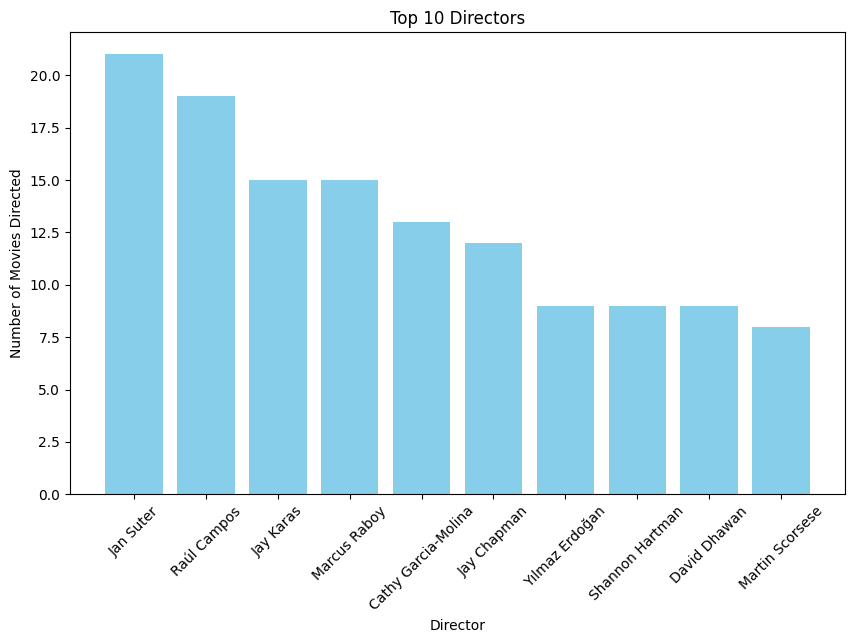

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(director_counts_top10['Director'], director_counts_top10['Number of Movies'], color='skyblue')
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.title('Top 10 Directors')
plt.xticks(rotation=45)
plt.show()

Inference -
* These are most productive directors in the platform, having some colaborative efforts with these directors will go a long way.
* For example Netflix original shows with these directors.
* As a promotion, netflix came up with an idea of ' Learning spanish with Narcos', which was a big success.


***---- cast column----***

**Top 10 directors who have produced large number of movies/ TV shows**

In [ ]:
top_actors = netflix_df.drop_duplicates(subset = ['title', 'cast'])
top_actors

,title,country,director,cast,show_id,type,date_added,release_year,rating,listed_in,duration
0,Dick Johnson Is Dead,United States,Kirsten Johnson,Unknown Actor,s1,Movie,2021-09-25 00:00:00,2020,PG-13,Documentaries,90 min
1,Blood & Water,South Africa,Unknown Director,Ama Qamata,s2,TV Show,2021-09-24 00:00:00,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
2,Blood & Water,South Africa,Unknown Director,Khosi Ngema,s2,TV Show,2021-09-24 00:00:00,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
3,Blood & Water,South Africa,Unknown Director,Gail Mabalane,s2,TV Show,2021-09-24 00:00:00,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
4,Blood & Water,South Africa,Unknown Director,Thabang Molaba,s2,TV Show,2021-09-24 00:00:00,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
53283,Zubaan,India,Mozez Singh,Manish Chaudhary,s8807,Movie,2019-03-02 00:00:00,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min
53284,Zubaan,India,Mozez Singh,Meghna Malik,s8807,Movie,2019-03-02 00:00:00,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min
53285,Zubaan,India,Mozez Singh,Malkeet Rauni,s8807,Movie,2019-03-02 00:00:00,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min
53286,Zubaan,India,Mozez Singh,Anita Shabdish,s8807,Movie,2019-03-02 00:00:00,2015,TV-14,"Dramas, International Movies, Music & Musicals",111 min


In [ ]:
actor_counts = top_actors['cast'].value_counts().reset_index()
actor_counts.sort_values(by = 'count', ascending = False)
actor_counts = actor_counts[actor_counts['cast'] != 'Unknown Actor']
actor_counts_top10 = actor_counts.head(10)
actor_counts_top10.columns = ['Actor', 'Number of Movies']
actor_counts_top10

,Actor,Number of Movies
1,Anupam Kher,41
2,Shah Rukh Khan,32
3,Takahiro Sakurai,29
4,Akshay Kumar,29
5,Naseeruddin Shah,29
6,Yuki Kaji,28
7,Amitabh Bachchan,28
8,Om Puri,27
9,Paresh Rawal,27
10,Kareena Kapoor,24


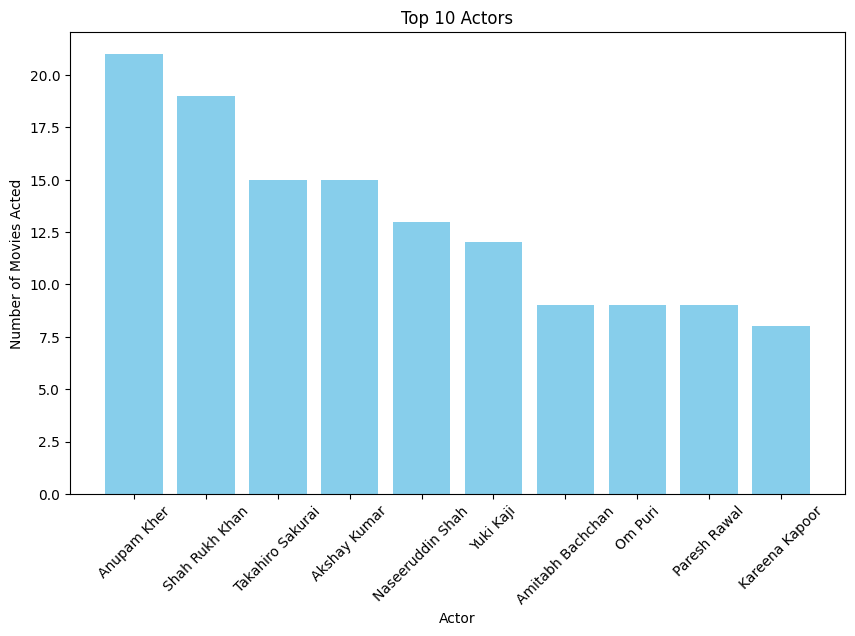

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(actor_counts_top10['Actor'], director_counts_top10['Number of Movies'], color='skyblue')
plt.xlabel('Actor')
plt.ylabel('Number of Movies Acted')
plt.title('Top 10 Actors')
plt.xticks(rotation=45)
plt.show()

Inference -
* These are very famous actors, new shows can be endorsed by these actors since they are quite famous and familiar among the people.

# Comparison of TV Shows and Movies


In [ ]:
df1 = netflix_df[['country','title', 'type', 'release_year']]
df1 = df1.drop_duplicates(subset = ['title', 'country'])
df2 = df1.groupby(['country','release_year', 'type']).size().reset_index(name='Total Count')
top_10_trend_countries = pd.DataFrame(df2)
top_10_trend_countries.groupby(['country', 'type'])['Total Count'].sum()


country       type   
Argentina     Movie      38
              TV Show    18
Australia     Movie      39
              TV Show    48
Austria       Movie       5
                         ..
Uruguay       Movie       3
Venezuela     Movie       1
Vietnam       Movie       7
West Germany  Movie       1
Zimbabwe      Movie       1
Name: Total Count, Length: 121, dtype: int64

In [ ]:
top_10_trend_countries_movies = top_10_trend_countries.loc[top_10_trend_countries['type'] == 'Movie']
top_10_trend_countries_movies = top_10_trend_countries_movies.groupby(['country'])['Total Count'].sum().sort_values(ascending = False).head(10)
top_10_trend_countries_movies = pd.DataFrame(top_10_trend_countries_movies)
top_10_trend_countries_movies.reset_index(inplace = True)
top_10_trend_countries_movies

,country,Total Count
0,United States,2058
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Japan,76
9,Turkey,76


<ipython-input-50-b757bc22bf21>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='Total Count', data=top_10_trend_countries_movies, palette='viridis')


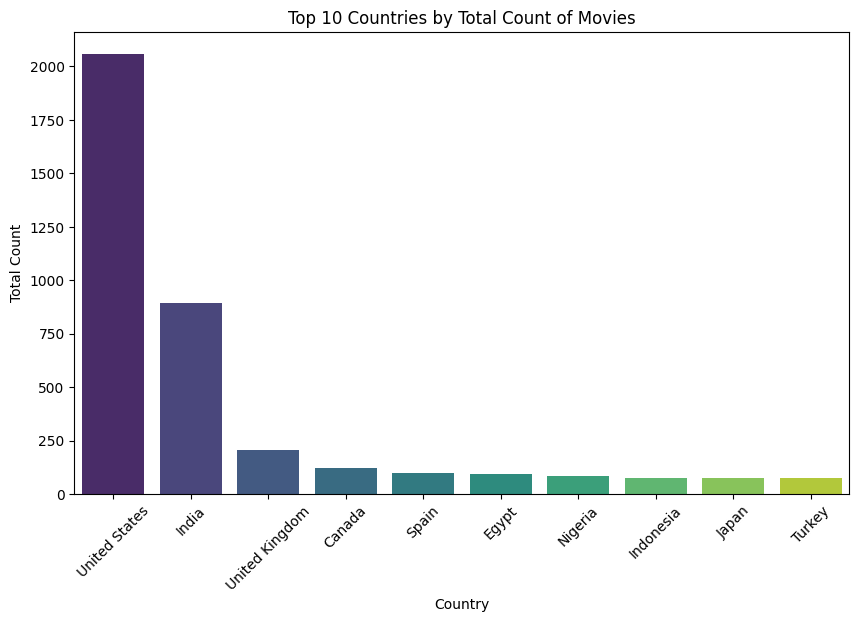

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='Total Count', data=top_10_trend_countries_movies, palette='viridis')

# Adding titles and labels
plt.title('Top 10 Countries by Total Count of Movies')
plt.xlabel('Country')
plt.ylabel('Total Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
top_10_trend_countries_tvshows = top_10_trend_countries.loc[top_10_trend_countries['type'] == 'TV Show']
top_10_trend_countries_tvshows = top_10_trend_countries_tvshows.groupby(['country'])['Total Count'].sum().sort_values(ascending = False).head(10)
top_10_trend_countries_tvshows = pd.DataFrame(top_10_trend_countries_tvshows)
top_10_trend_countries_tvshows.reset_index(inplace = True)
top_10_trend_countries_tvshows

,country,Total Count
0,United States,760
1,United Kingdom,213
2,Japan,169
3,South Korea,158
4,India,79
5,Taiwan,68
6,Canada,59
7,France,49
8,Spain,48
9,Australia,48


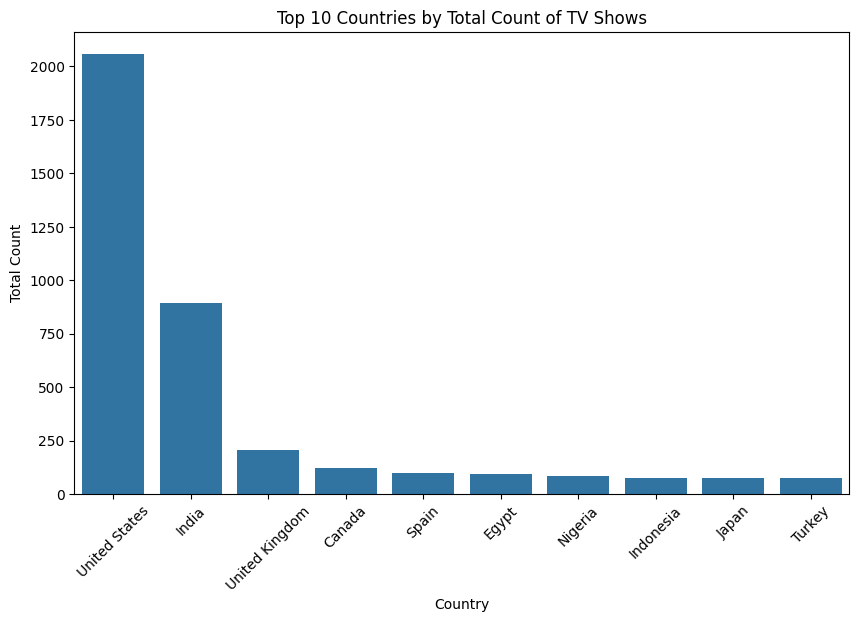

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='Total Count', data=top_10_trend_countries_movies)

# Adding titles and labels
plt.title('Top 10 Countries by Total Count of TV Shows')
plt.xlabel('Country')
plt.ylabel('Total Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Popular Genres

***listed_in column***

In [ ]:
popular_genres = netflix_df.drop_duplicates(subset = ['title'])
popular_genres = popular_genres[popular_genres['type']=='Movie']
popular_genres = pd.DataFrame(popular_genres['listed_in'].value_counts().sort_values(ascending = False))
popular_genres.reset_index(inplace = True)
popular_genres.columns = ['Genre', 'Count']
popular_genres = popular_genres.head(10)
popular_genres

,Genre,Count
0,Stand-Up Comedy,302
1,Documentaries,300
2,"Dramas, International Movies",269
3,"Comedies, Dramas, International Movies",232
4,"Dramas, Independent Movies, International Movies",166
5,"Dramas, International Movies, Romantic Movies",152
6,"Comedies, International Movies",147
7,"Comedies, International Movies, Romantic Movies",137
8,"Children & Family Movies, Comedies",120
9,Children & Family Movies,113


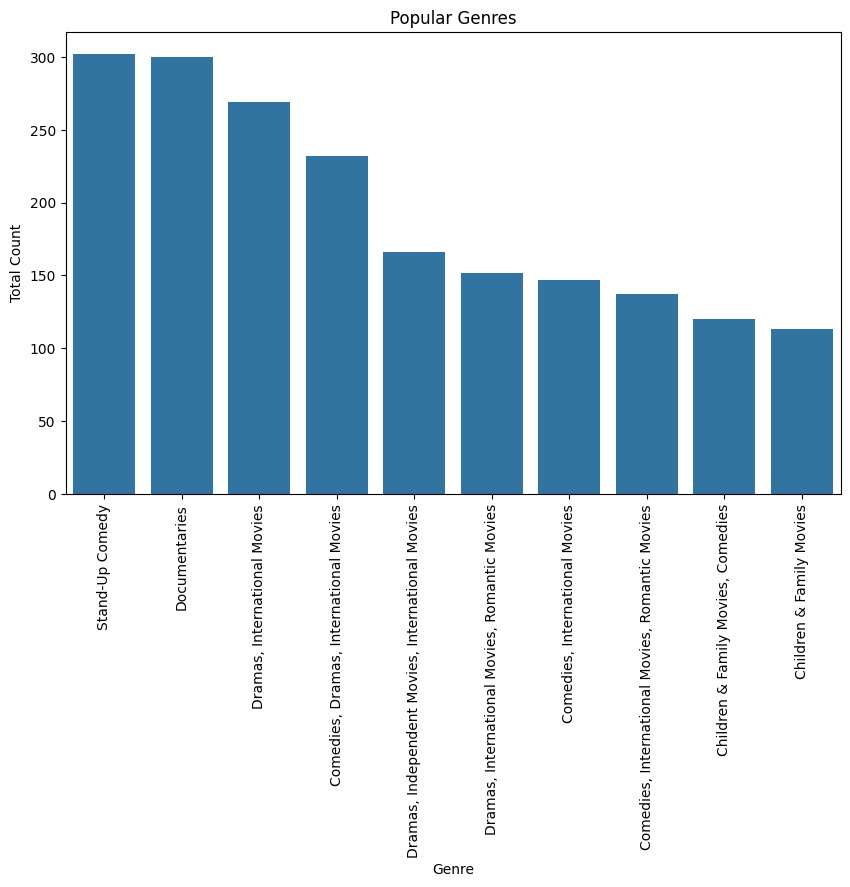

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Count', data=popular_genres)

# Adding titles and labels
plt.title('Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Total Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

Inference -
* People tend to have a liking towards reality programs and documentaries which is quite surprising.
* Infotainment is still untapped area for netflix and there is lot opportunity for that.